<a href="https://www.kaggle.com/code/theyazilimci/fake-news-classification-88-acc?scriptVersionId=93452812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd 
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('../input/fake-news-classification/WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [4]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

delete nan values 

In [5]:
df.dropna(inplace=True)

In [6]:
title = df['title'].tolist()
text = df["text"].tolist()
labels = df['label'].tolist()
title[:5]

['LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]',
 'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]',
 'Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid',
 'SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice',
 'About Time! Christian Group Sues Amazon and SPLC for Designation as Hate Group']

#### Make training and testing set with 80% of training

In [7]:
training_size = int(len(title) * 0.8)

training_sentences = title[0:training_size]
testing_sentences = title[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

len(training_sentences),len(testing_sentences)

(57229, 14308)

In [8]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
#word_index

### Word index give us the references of each word 
<code>
{'OOV': 1,
 'to': 2,
 'the': 3,
 'trump': 4,
 'in': 5,
 'of': 6,
 'for': 7,
 'on': 8,
 'new': 9,
 'video': 10,
 'a': 11,
 'and': 12,
 'york': 13,
 'times': 14,
    </code>

In [10]:
reversed_index = [ (value,key) for (key,value) in word_index.items()] 

### we got something like this after reversed the word index 
<code>
[(1, 'OOV'),
 (2, 'to'),
 (3, 'the'),
 (4, 'trump'),
 (5, 'in'),
 (6, 'of'),
 (7, 'for'),
 (8, 'on'),
 (9, 'new'),
 (10, 'video'),
 (11, 'a'),
 (12, 'and'),
 (13, 'york'),
 (14, 'times'),
 (15, 'u'),
 (16, 'is'),
 (17, 's'),
 (18, 'with'),
 (19, 'says'),
 (20, 'at'),
 (21, 'hillary'),
</code>

In [11]:
training_sequences[:5]

[[127, 1, 8, 354, 1, 1, 1, 59, 433, 12, 1, 8, 355, 1, 1, 12, 1, 1, 10],
 [1, 110, 420, 318, 19, 199, 1, 1, 421, 1, 1, 63, 362, 54, 6, 66, 1, 10],
 [1, 1, 1, 1, 1, 442, 6, 1, 1, 2, 1, 1, 7, 1, 158, 1],
 [1, 224, 48, 1, 88, 483, 6, 262, 1, 9, 1, 56, 1, 122, 273, 1],
 [29, 147, 1, 284, 1, 1, 12, 1, 7, 1, 25, 468, 284]]

In [12]:
text = ""
for i in range(len(training_sequences[0])):
    text += reversed_index[training_sequences[0][i]][1]
    text += " "
text    

'day to new 9 to to to what pence york to new re to to york to to a '

### We will make prediction with two different features firstly a prediction with only the title then a prediction with the text to see which preform the best 

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

2022-04-19 15:14:38.056301: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

2022-04-19 15:14:38.637530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1789/1789 [==============================] - 5s 2ms/step - loss: 0.4324 - accuracy: 0.8038 - val_loss: 0.3222 - val_accuracy: 0.8605
Epoch 2/30
1789/1789 [==============================] - 4s 2ms/step - loss: 0.3004 - accuracy: 0.8689 - val_loss: 0.3036 - val_accuracy: 0.8656
Epoch 3/30
1789/1789 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.8718 - val_loss: 0.3022 - val_accuracy: 0.8653
Epoch 4/30
1789/1789 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.8725 - val_loss: 0.3022 - val_accuracy: 0.8643
Epoch 5/30
1789/1789 [==============================] - 4s 2ms/step - loss: 0.2900 - accuracy: 0.8715 - val_loss: 0.3013 - val_accuracy: 0.8658
Epoch 6/30
1789/1789 [==============================] - 4s 2ms/step - loss: 0.2897 - accuracy: 0.8732 - val_loss: 0.3008 - val_accuracy: 0.8659
Epoch 7/30
1789/1789 [==============================] - 4s 2ms/step - loss: 0.2892 - accuracy: 0.8722 - val_loss: 0.3013 - val_accuracy:

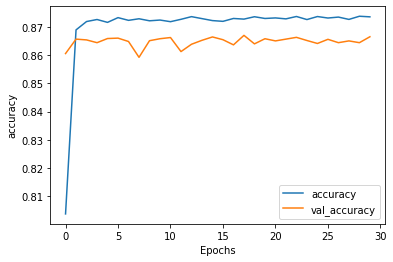

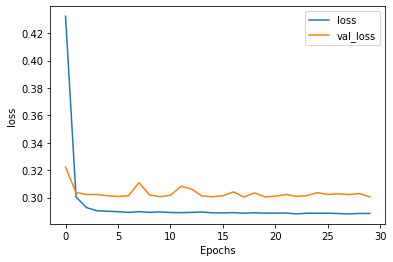

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
preds = model.predict(testing_padded)

In [17]:
def roundArray(number):
    ret = 0
    if number > 0.5:
        ret = 1
    return ret 

preds = preds.flatten()
result = list(map(roundArray, preds))
result[:10]

[1, 1, 0, 0, 1, 0, 0, 0, 1, 0]

In [18]:
title = df['title'].tolist()
labels = df['label'].tolist()

training_size = int(len(title) * 0.8)

testing_sentences = title[training_size:]
testing_labels = labels[training_size:]

In [19]:
testing_labels[:10]

[1, 1, 0, 1, 1, 0, 1, 0, 0, 1]

In [20]:
error = 0

for i in range(len(result)):
    res = result[i]
    true = testing_labels[i]
    if res != true:
        error += 1
        
error,len(result),(len(result)-error)/len(result)*100

(1911, 14308, 86.64383561643835)

## 87% of accuracy in the test set 